In [3]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Download information (source: Madrid City Council https://datos.madrid.es)
!wget -q -O 'accidents.csv' https://datos.madrid.es/egob/catalogo/300228-18-accidentes-trafico-detalle.csv

In [5]:
# Check the encoding of the csv
#!pip install chardet
#import chardet

#with open("accidents.csv", 'rb') as file:
#    print(chardet.detect(file.read()))

In [6]:
df_accidents = pd.read_csv('accidents.csv', sep=';', encoding='ISO-8859-1')
df_accidents.head(5)

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,...,CPSV Grava Suelta,CPSV Hielo,CPSV Seca Y Limpia,* Nº VICTIMAS,TIPO ACCIDENTE,Tipo Vehiculo,TIPO PERSONA,SEXO,LESIVIDAD,Tramo Edad
0,01/01/2018,DE 00:00 A 00:59,LUNES,USERA,CALLE DE SAN BASILIO - CALLE DEL CRISTO DE LA ...,0,2018/1,NO,NO,NO,...,NO,NO,SI,1,ATROPELLO,NO ASIGNADO,PEATON,HOMBRE,HG,DE 15 A 17 AÑOS
1,01/01/2018,DE 00:00 A 00:59,LUNES,USERA,CALLE DE SAN BASILIO - CALLE DEL CRISTO DE LA ...,0,2018/1,NO,NO,NO,...,NO,NO,SI,1,ATROPELLO,NO ASIGNADO,TESTIGO,HOMBRE,IL,DE 30 A 34 ANOS
2,01/01/2018,DE 00:00 A 00:59,LUNES,USERA,CALLE DE SAN BASILIO - CALLE DEL CRISTO DE LA ...,0,2018/1,NO,NO,NO,...,NO,NO,SI,1,ATROPELLO,TURISMO,CONDUCTOR,HOMBRE,IL,DE 35 A 39 AÑOS
3,01/01/2018,DE 1:00 A 1:59,LUNES,HORTALEZA,AVENIDA DE FRANCISCO PI Y MARGALL - AVENIDA DE...,,2018/3,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,NO ASIGNADO,TESTIGO,HOMBRE,IL,DE 21 A 24 AÑOS
4,01/01/2018,DE 1:00 A 1:59,LUNES,HORTALEZA,AVENIDA DE FRANCISCO PI Y MARGALL - AVENIDA DE...,,2018/3,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,NO ASIGNADO,TESTIGO,MUJER,IL,DE 40 A 44 AÑOS


In [7]:
df_accidents.shape

(30122, 26)

In [8]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30122 entries, 0 to 30121
Data columns (total 26 columns):
FECHA                 30122 non-null object
RANGO HORARIO         30122 non-null object
DIA SEMANA            30122 non-null object
DISTRITO              30122 non-null object
LUGAR ACCIDENTE       30122 non-null object
Nº                    30122 non-null object
Nº PARTE              30122 non-null object
CPFA Granizo          30122 non-null object
CPFA Hielo            30122 non-null object
CPFA Lluvia           30122 non-null object
CPFA Niebla           30122 non-null object
CPFA Seco             30122 non-null object
CPFA Nieve            30122 non-null object
CPSV Mojada           30122 non-null object
CPSV Aceite           30122 non-null object
CPSV Barro            30122 non-null object
CPSV Grava Suelta     30122 non-null object
CPSV Hielo            30122 non-null object
CPSV Seca Y Limpia    30122 non-null object
* Nº VICTIMAS         30122 non-null int64
TIPO ACCIDEN

In [9]:
df_accidents.describe()

,* Nº VICTIMAS
count,30122.000000
mean,1.459232
std,1.232216
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,19.000000


# Data cleasing

In [10]:
# Delete columns
df_accidents = df_accidents.drop(df_accidents.columns[[4, 5, 6]], axis=1)

# Rename columns
df_accidents.rename(columns={'* Nº VICTIMAS':'Victimas'}, inplace=True)

In [11]:
df_accidents.shape

(30122, 23)

In [12]:
# Check if there is any missing value
df_accidents.isna().sum()

FECHA                 0
RANGO HORARIO         0
DIA SEMANA            0
DISTRITO              0
CPFA Granizo          0
CPFA Hielo            0
CPFA Lluvia           0
CPFA Niebla           0
CPFA Seco             0
CPFA Nieve            0
CPSV Mojada           0
CPSV Aceite           0
CPSV Barro            0
CPSV Grava Suelta     0
CPSV Hielo            0
CPSV Seca Y Limpia    0
Victimas              0
TIPO ACCIDENTE        0
Tipo Vehiculo         0
TIPO PERSONA          0
SEXO                  0
LESIVIDAD             0
Tramo Edad            0
dtype: int64

In [13]:
# Check if there is any null value
df_accidents.isnull().sum()

FECHA                 0
RANGO HORARIO         0
DIA SEMANA            0
DISTRITO              0
CPFA Granizo          0
CPFA Hielo            0
CPFA Lluvia           0
CPFA Niebla           0
CPFA Seco             0
CPFA Nieve            0
CPSV Mojada           0
CPSV Aceite           0
CPSV Barro            0
CPSV Grava Suelta     0
CPSV Hielo            0
CPSV Seca Y Limpia    0
Victimas              0
TIPO ACCIDENTE        0
Tipo Vehiculo         0
TIPO PERSONA          0
SEXO                  0
LESIVIDAD             0
Tramo Edad            0
dtype: int64

In [14]:
# Drop rows with value TIPO PERSONA = TESTIGO, as witness were not directly involved in the accident
df_accidents = df_accidents[df_accidents['TIPO PERSONA']!='TESTIGO                                 ']

In [15]:
df_accidents.head()

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,CPFA Granizo,CPFA Hielo,CPFA Lluvia,CPFA Niebla,CPFA Seco,CPFA Nieve,...,CPSV Grava Suelta,CPSV Hielo,CPSV Seca Y Limpia,Victimas,TIPO ACCIDENTE,Tipo Vehiculo,TIPO PERSONA,SEXO,LESIVIDAD,Tramo Edad
0,01/01/2018,DE 00:00 A 00:59,LUNES,USERA,NO,NO,NO,NO,SI,NO,...,NO,NO,SI,1,ATROPELLO,NO ASIGNADO,PEATON,HOMBRE,HG,DE 15 A 17 AÑOS
2,01/01/2018,DE 00:00 A 00:59,LUNES,USERA,NO,NO,NO,NO,SI,NO,...,NO,NO,SI,1,ATROPELLO,TURISMO,CONDUCTOR,HOMBRE,IL,DE 35 A 39 AÑOS
7,01/01/2018,DE 1:00 A 1:59,LUNES,HORTALEZA,NO,NO,NO,NO,SI,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,TURISMO,CONDUCTOR,HOMBRE,IL,DE 21 A 24 AÑOS
8,01/01/2018,DE 1:00 A 1:59,LUNES,HORTALEZA,NO,NO,NO,NO,SI,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,TURISMO,VIAJERO,HOMBRE,HG,DE 21 A 24 AÑOS
9,01/01/2018,DE 1:00 A 1:59,LUNES,SAN BLAS,NO,NO,NO,NO,SI,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 25 A 29 AÑOS


# EDA

In [16]:
# Traffic accidents by day of the week
df_day = df_accidents['DIA SEMANA'].value_counts()
df_day

VIERNES      4721
MIERCOLES    4042
MARTES       4028
LUNES        3906
JUEVES       3899
SABADO       3018
DOMINGO      2849
Name: DIA SEMANA, dtype: int64

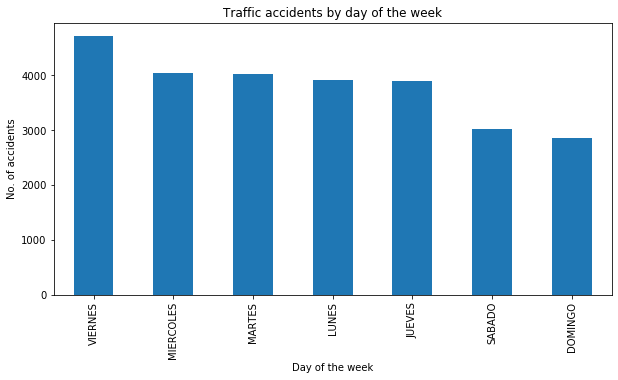

In [17]:
df_day.plot(kind='bar', 
             stacked=False,
             figsize=(10, 5))

plt.title('Traffic accidents by day of the week')
plt.ylabel('No. of accidents')
plt.xlabel('Day of the week')

plt.show()

In [18]:
# Traffic accidents by type of accident
df_tipo = df_accidents['TIPO ACCIDENTE'].value_counts()

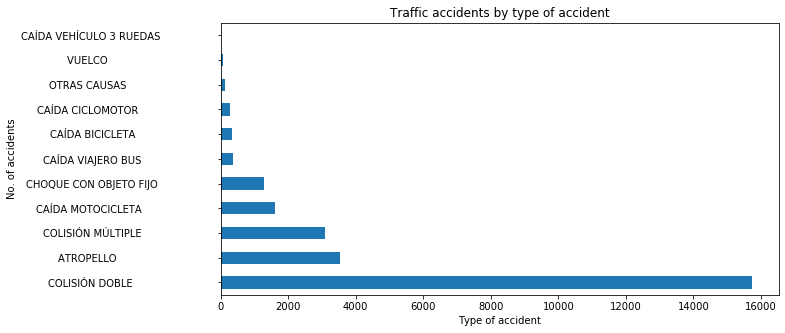

In [19]:
df_tipo.plot(kind='barh', 
             stacked=True,
             figsize=(10, 5))

plt.title('Traffic accidents by type of accident')
plt.ylabel('No. of accidents')
plt.xlabel('Type of accident')

plt.show()

In [20]:
# Traffic accidents by type of person involved
df_person = df_accidents['TIPO PERSONA'].value_counts()
df_person

CONDUCTOR                                   19333
VIAJERO                                      5365
PEATON                                       1765
Name: TIPO PERSONA, dtype: int64

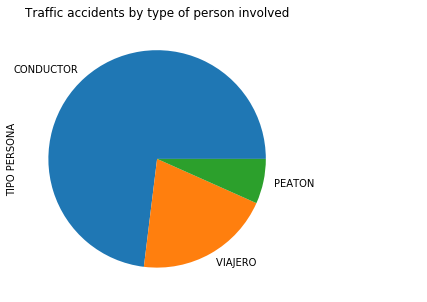

In [21]:
df_person.plot(kind='pie', 
             stacked=True,
             figsize=(10, 5))

plt.title('Traffic accidents by type of person involved')

plt.show()

In [22]:
# Traffic accidents by sex
df_sex = df_accidents['SEXO'].value_counts()
df_sex

HOMBRE         16556
MUJER           8682
NO ASIGNADO     1225
Name: SEXO, dtype: int64

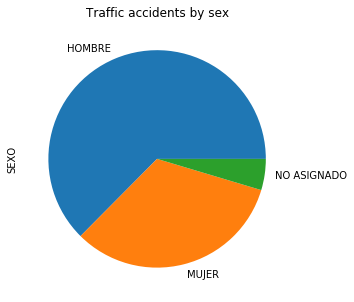

In [23]:
df_sex.plot(kind='pie', 
             stacked=True,
             figsize=(10, 5))

plt.title('Traffic accidents by sex')

plt.show()

In [24]:
# Casualties by date
df_date = df_accidents.groupby('FECHA').sum()
df_date.sort_values(['Victimas'], ascending=False, axis=0, inplace=True)
df_date.head(10).reset_index()

,FECHA,Victimas
0,07/03/2018,514
1,20/07/2018,487
2,17/07/2018,345
3,23/05/2018,286
4,15/04/2018,271
5,06/04/2018,238
6,09/05/2018,236
7,27/04/2018,226
8,06/01/2018,216
9,06/10/2018,212


In [25]:
df_accidents.describe()

,Victimas
count,26463.000000
mean,1.488115
std,1.278060
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,19.000000


# Determining normality

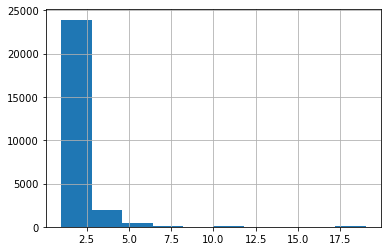

In [26]:
df_accidents.Victimas.hist();

In [27]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
normaltest(df_accidents.Victimas.values)

NormaltestResult(statistic=31902.082170149784, pvalue=0.0)

In [28]:
# Testing log
log_casualties = np.log(df_accidents.Victimas)

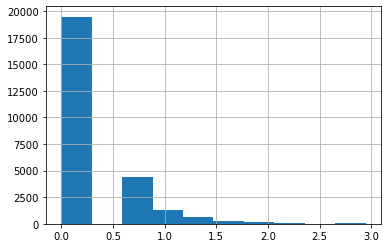

In [29]:
log_casualties.hist()

In [30]:
normaltest(log_casualties)

NormaltestResult(statistic=10340.212264191083, pvalue=0.0)

In [31]:
# Box cox
from scipy.stats import boxcox
bc_result = boxcox(df_accidents.Victimas)
boxcox_casualties = bc_result[0]
lam = bc_result[1]

(array([19470.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         4445.,  2548.]),
 array([0.        , 0.03015594, 0.06031189, 0.09046783, 0.12062378,
        0.15077972, 0.18093567, 0.21109161, 0.24124756, 0.2714035 ,
        0.30155945]),
 <a list of 10 Patch objects>)

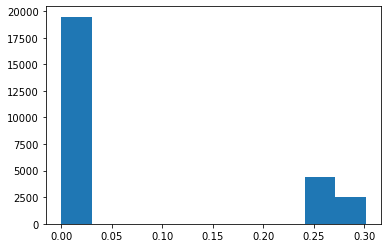

In [32]:
plt.hist(boxcox_casualties)

In [33]:
normaltest(boxcox_casualties)

NormaltestResult(statistic=6011.159265145325, pvalue=0.0)

(array([1.947e+04, 4.445e+03, 1.917e+03, 2.790e+02, 1.680e+02, 6.500e+01,
        4.600e+01, 1.500e+01, 1.700e+01, 4.100e+01]),
 array([1.        , 1.33588989, 1.67177979, 2.00766968, 2.34355958,
        2.67944947, 3.01533937, 3.35122926, 3.68711915, 4.02300905,
        4.35889894]),
 <a list of 10 Patch objects>)

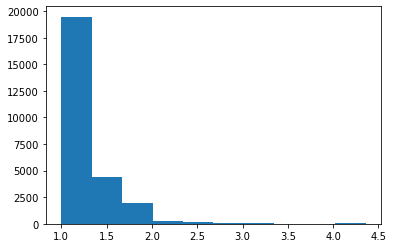

In [34]:
# Square root
sqrt_casualties = np.sqrt(df_accidents.Victimas)
plt.hist(sqrt_casualties)

In [35]:
normaltest(sqrt_casualties)

NormaltestResult(statistic=19078.37606717139, pvalue=0.0)

# One-hot encoding

In [36]:
df_accidents = df_accidents.drop(df_accidents.columns[[0]], axis=1)
df_accidents.head()

,RANGO HORARIO,DIA SEMANA,DISTRITO,CPFA Granizo,CPFA Hielo,CPFA Lluvia,CPFA Niebla,CPFA Seco,CPFA Nieve,CPSV Mojada,...,CPSV Grava Suelta,CPSV Hielo,CPSV Seca Y Limpia,Victimas,TIPO ACCIDENTE,Tipo Vehiculo,TIPO PERSONA,SEXO,LESIVIDAD,Tramo Edad
0,DE 00:00 A 00:59,LUNES,USERA,NO,NO,NO,NO,SI,NO,NO,...,NO,NO,SI,1,ATROPELLO,NO ASIGNADO,PEATON,HOMBRE,HG,DE 15 A 17 AÑOS
2,DE 00:00 A 00:59,LUNES,USERA,NO,NO,NO,NO,SI,NO,NO,...,NO,NO,SI,1,ATROPELLO,TURISMO,CONDUCTOR,HOMBRE,IL,DE 35 A 39 AÑOS
7,DE 1:00 A 1:59,LUNES,HORTALEZA,NO,NO,NO,NO,SI,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,TURISMO,CONDUCTOR,HOMBRE,IL,DE 21 A 24 AÑOS
8,DE 1:00 A 1:59,LUNES,HORTALEZA,NO,NO,NO,NO,SI,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,TURISMO,VIAJERO,HOMBRE,HG,DE 21 A 24 AÑOS
9,DE 1:00 A 1:59,LUNES,SAN BLAS,NO,NO,NO,NO,SI,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 25 A 29 AÑOS


In [37]:
# Select the object (string) columns
mask = df_accidents.dtypes == np.object
categorical_cols = df_accidents.columns[mask]

In [38]:
# Determine how many extra columns would be created
num_ohc_cols = (df_accidents[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 107 columns, assuming the original ones are dropped. 
small_num_ohc_cols.sum()

107

In [39]:
# Create a new data set where all of the above categorical features will be one-hot encoded
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = df_accidents.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

In [40]:
# Column difference is as calculated above
data_ohc.shape[1] - df_accidents.shape[1]

107

In [41]:
print(df_accidents.shape[1])

# Remove the string columns from the dataframe
df_accidents = df_accidents.drop(num_ohc_cols.index, axis=1)

print(df_accidents.shape[1])

22
1


In [42]:
# Create train and test splits of the data set
from sklearn.model_selection import train_test_split

y_col = 'Victimas'

# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

In [43]:
data_ohc.head(5)

,Victimas,RANGO HORARIO_0,RANGO HORARIO_1,RANGO HORARIO_2,RANGO HORARIO_3,RANGO HORARIO_4,RANGO HORARIO_5,RANGO HORARIO_6,RANGO HORARIO_7,RANGO HORARIO_8,...,CPSV Barro_0,CPSV Barro_1,CPSV Grava Suelta_0,CPSV Grava Suelta_1,CPSV Hielo_0,CPSV Hielo_1,CPSV Seca Y Limpia_0,CPSV Seca Y Limpia_1,CPSV Aceite_0,CPSV Aceite_1
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [44]:
data_ohc.shape

(26463, 129)

In [45]:
data_ohc.dtypes

Victimas                  int64
RANGO HORARIO_0         float64
RANGO HORARIO_1         float64
RANGO HORARIO_2         float64
RANGO HORARIO_3         float64
RANGO HORARIO_4         float64
RANGO HORARIO_5         float64
RANGO HORARIO_6         float64
RANGO HORARIO_7         float64
RANGO HORARIO_8         float64
RANGO HORARIO_9         float64
RANGO HORARIO_10        float64
RANGO HORARIO_11        float64
RANGO HORARIO_12        float64
RANGO HORARIO_13        float64
RANGO HORARIO_14        float64
RANGO HORARIO_15        float64
RANGO HORARIO_16        float64
RANGO HORARIO_17        float64
RANGO HORARIO_18        float64
RANGO HORARIO_19        float64
RANGO HORARIO_20        float64
RANGO HORARIO_21        float64
RANGO HORARIO_22        float64
RANGO HORARIO_23        float64
DISTRITO_0              float64
DISTRITO_1              float64
DISTRITO_2              float64
DISTRITO_3              float64
DISTRITO_4              float64
                         ...   
TIPO PER

# Train and test

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))


error_df

[train    1.221186
 test     1.194478
 Name: one-hot enc, dtype: float64]

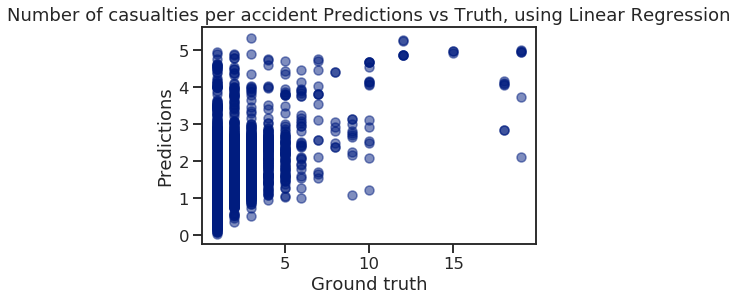

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test_ohc, y_test_ohc_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Number of casualties per accident Predictions vs Truth, using Linear Regression');

# Cross validation

In [48]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [49]:
data_ohc = data_ohc.reset_index()
X = data_ohc.drop('Victimas', axis=1)
y = data_ohc.Victimas

In [50]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [51]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 0  2  4  5  6  8 10 11 12 13] 17642
Test index: [ 1  3  7  9 14 17 18 19 20 26] 8821

Train index: [ 0  1  2  3  4  7  8  9 10 11] 17642
Test index: [ 5  6 16 22 23 24 29 38 41 43] 8821

Train index: [ 1  3  5  6  7  9 14 16 17 18] 17642
Test index: [ 0  2  4  8 10 11 12 13 15 21] 8821



In [52]:
scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    lr.fit(X_train, y_train)
        
    y_pred = lr.predict(X_test)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)
    
scores

[0.25680219387013503, 0.22645297494653172, 0.25643158986857195]

In [53]:
# Scaling
scores = []

lr = LinearRegression()
s = StandardScaler()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    X_train_s = s.fit_transform(X_train)
    
    lr.fit(X_train_s, y_train)
    
    X_test_s = s.transform(X_test)
    
    y_pred = lr.predict(X_test_s)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)
    
scores

[0.25666920400037796, 0.22649752484204733, 0.2564449533587234]

In [54]:
# Hyperparameter tuning
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [55]:
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10446.101095382655, tolerance: 2.8133928352794486
  positive)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11724.156668666603, tolerance: 3.1978390261875114
  positive)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9784.539046474127, tolerance: 2.6332655991384213
  positive)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to inc

In [56]:
list(zip(alphas,scores))

[(1e-09, 0.24887118802440888),
 (1e-08, 0.24887118886983872),
 (1e-07, 0.24887119732212748),
 (1e-06, 0.2488712816618286),
 (1e-05, 0.2488723038377859),
 (0.0001, 0.24887619113517923),
 (0.001, 0.24887174362252773),
 (0.01, 0.24633063661194332),
 (0.1, 0.1788869330665105),
 (1.0, -0.00017640843345367863)]

In [57]:
Lasso(alpha=1e-6).fit(X, y).coef_

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5449.1988061074935, tolerance: 4.322401231908705
  positive)


array([ 1.36341033e-06,  1.05666359e-01,  1.89363047e-03, -1.19331324e-01,
       -3.90787029e-02, -1.20170343e-01,  9.33688623e-02,  4.56393768e-02,
       -9.64661739e-02,  6.05335791e-02, -5.52274578e-02, -4.87164983e-02,
        8.61944334e-02,  1.23820276e-02,  1.58445942e-01,  4.76525392e-03,
       -4.15339221e-02,  6.78115921e-01, -1.01043396e-01,  4.58220940e-03,
        1.56892609e-01,  2.25412728e-01, -1.11824921e-01, -7.72288935e-02,
       -1.58455522e-01,  1.09692472e-02, -7.08815978e-02,  1.01549916e-01,
        3.99628916e-02, -7.75539642e-02, -3.40424699e-03, -6.36147745e-02,
       -7.96436127e-02, -8.19901828e-02, -1.25652587e-02,  2.16759315e-02,
       -2.87228629e-02,  1.82118481e-01, -1.34283539e-01,  6.09983976e-02,
        1.42108063e-02,  6.71501452e-02,  1.36944544e-02, -4.84995060e-02,
       -3.71243868e-02, -1.98084833e-02,  1.23822641e-01,  1.07644366e-01,
        1.45941880e-01,  1.22605201e-01,  3.60671312e-02,  1.37842624e-02,
        4.90262060e-04, -

In [58]:
Lasso(alpha=1.0).fit(X, y).coef_

array([ 8.05734695e-07,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

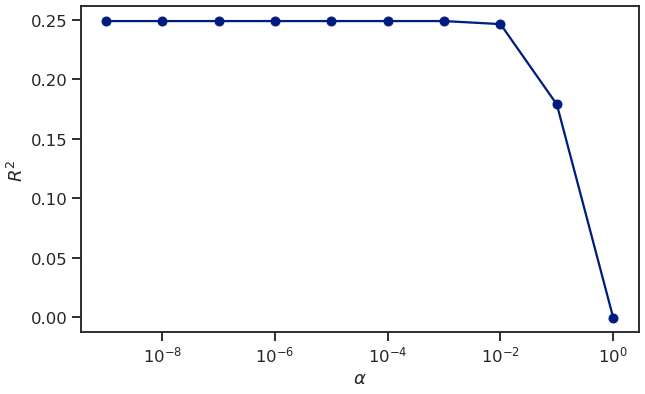

In [59]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [ ]:
# PolynomialFeatures

pf = PolynomialFeatures(degree=3)

scores = []
alphas = np.geomspace(0.06, 6.0, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [ ]:
plt.semilogx(alphas, scores);

In [ ]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)